# HPC_Assignment1

Write a program of matrix multiplication to demonstrate the performance enhancement done by parallelizing the code through Open MP threads. Analyze the speedup and efficiency of the parallelized code. 

- Vary the size of your matrices from 5, 50, 100, 500, 750, 1000, and 2000 and measure the runtime with one thread. 

- For each matrix size, change the number of threads from 2,4,8,10,15,20 and plot the speedup versus the number of threads. Compute the efficiency. 

- Display a visualization of performance comparison between serial, parallel and NumPY code.

- Explain whether or not the scaling behavior is as expected.



In [1]:
import time
import numpy as np
import concurrent.futures
import pandas as pd

def sequential_matrix_multiply(matrix_a, matrix_b):
    return np.dot(matrix_a, matrix_b)

def parallel_matrix_multiply(matrix_a, matrix_b, num_threads):
    with concurrent.futures.ThreadPoolExecutor(max_workers=num_threads) as executor:
        result = np.zeros_like(matrix_a)
        chunk_size = len(matrix_a) // num_threads
        futures = []

        for i in range(num_threads):
            start_idx = i * chunk_size
            end_idx = start_idx + chunk_size
            futures.append(executor.submit(np.dot, matrix_a[start_idx:end_idx], matrix_b, out=result[start_idx:end_idx]))

        concurrent.futures.wait(futures)

    return result

matrix_sizes = [(5, 5), (50, 50), (100, 100), (250, 250),(500,500), (750, 750), (1000, 1000), (2000, 2000), (5000, 5000)]

# Create an empty list to store the results
results_list = []

for matrix_size in matrix_sizes:
    rows, cols = matrix_size
    matrix_a = np.random.rand(rows, cols)
    matrix_b = np.random.rand(cols, rows)

    # Sequential multiplication
    start_time = time.time()
    result_seq = sequential_matrix_multiply(matrix_a, matrix_b)
    sequential_time = time.time() - start_time

    # Parallel multiplication with different numbers of threads
    for num_threads in [2, 4, 8, 10, 15, 20]:
        start_time = time.time()
        result_parallel = parallel_matrix_multiply(matrix_a, matrix_b, num_threads)
        parallel_time = time.time() - start_time

        # Append the results to the list
        results_list.append({
            'Matrix Size': matrix_size,
            'Threads': num_threads,
            'Sequential Time': sequential_time,
            'Parallel Time': parallel_time
        })

df = pd.DataFrame(results_list)
print(df)

     Matrix Size  Threads  Sequential Time  Parallel Time
0         (5, 5)        2         0.000000       0.000000
1         (5, 5)        4         0.000000       0.000000
2         (5, 5)        8         0.000000       0.000000
3         (5, 5)       10         0.000000       0.000000
4         (5, 5)       15         0.000000       0.015622
5         (5, 5)       20         0.000000       0.000000
6       (50, 50)        2         0.000000       0.000000
7       (50, 50)        4         0.000000       0.000000
8       (50, 50)        8         0.000000       0.000000
9       (50, 50)       10         0.000000       0.000000
10      (50, 50)       15         0.000000       0.015620
11      (50, 50)       20         0.000000       0.003010
12    (100, 100)        2         0.000000       0.000000
13    (100, 100)        4         0.000000       0.000000
14    (100, 100)        8         0.000000       0.000000
15    (100, 100)       10         0.000000       0.013010
16    (100, 10

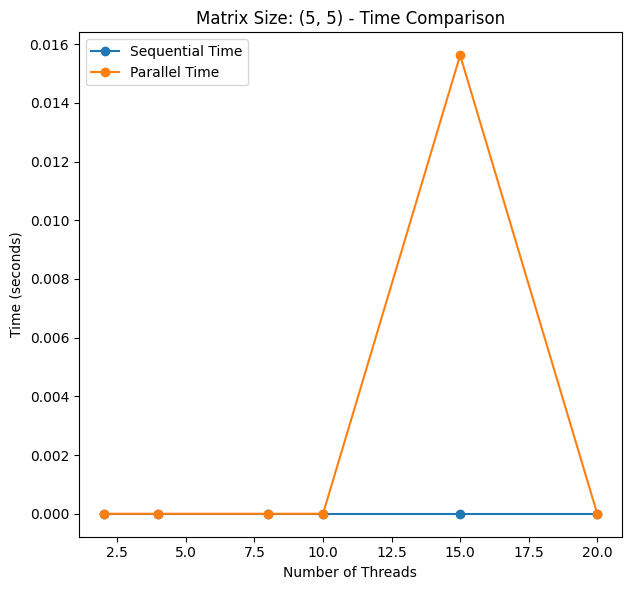

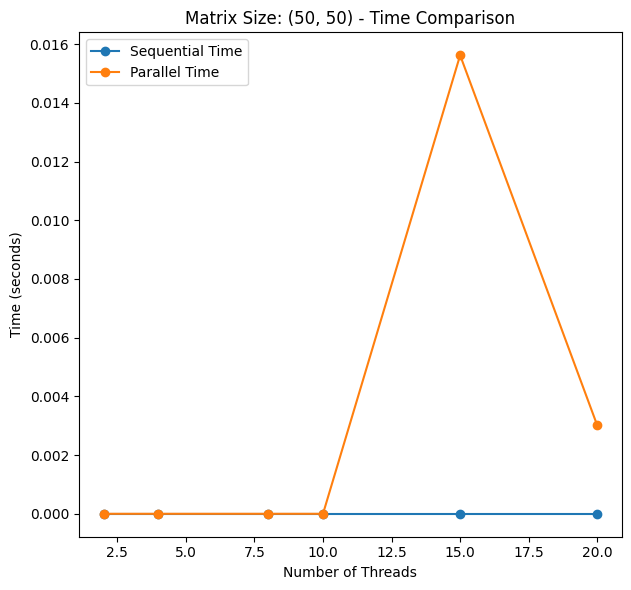

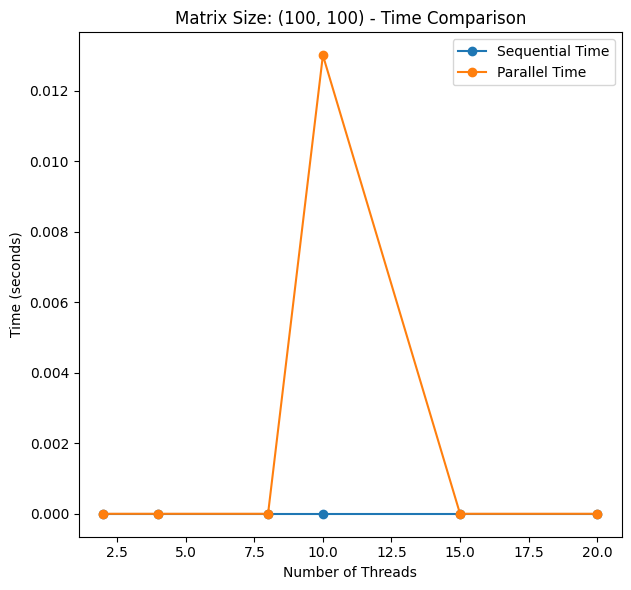

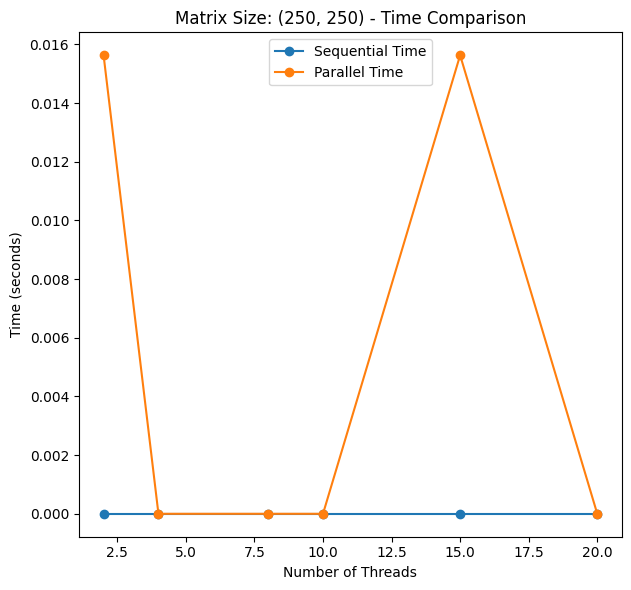

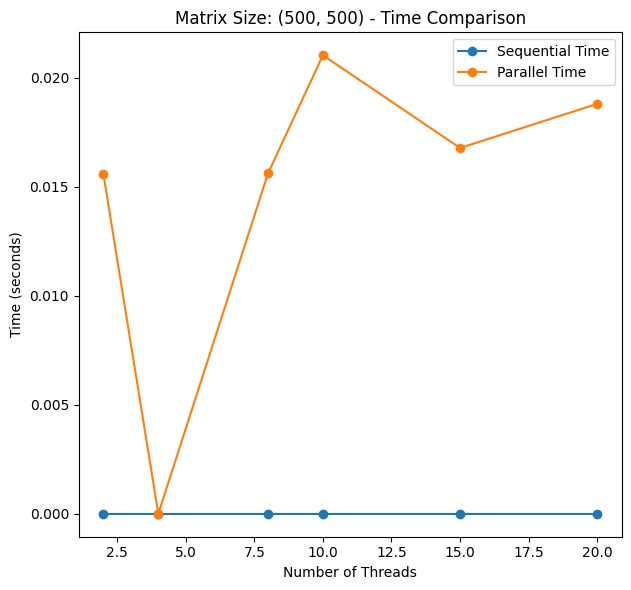

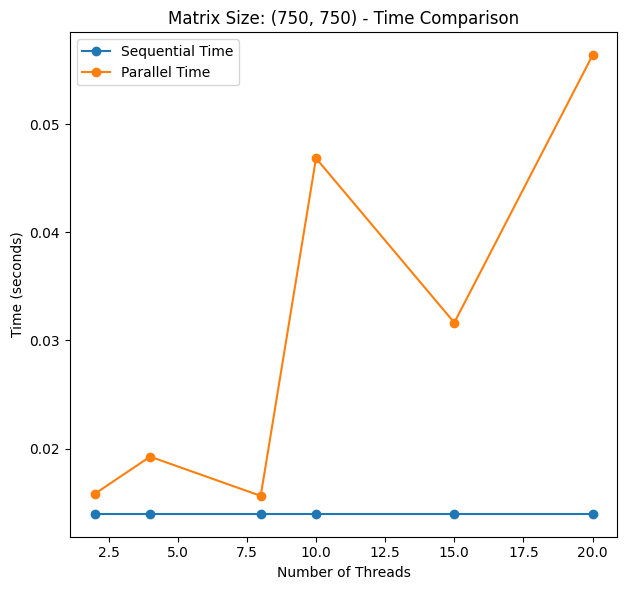

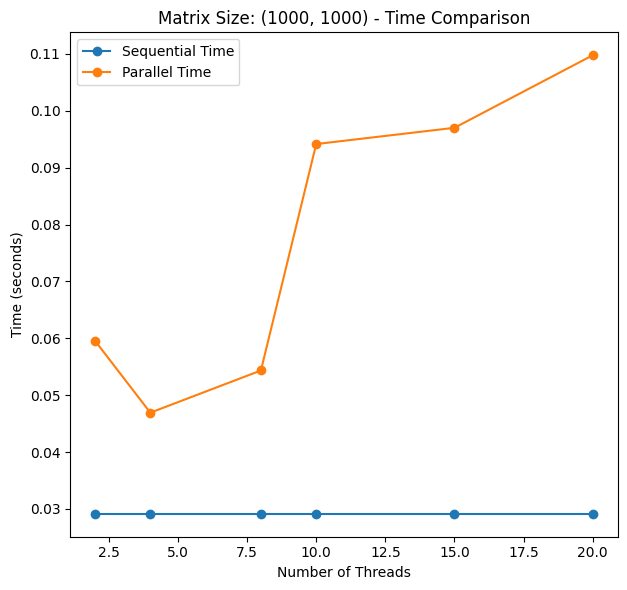

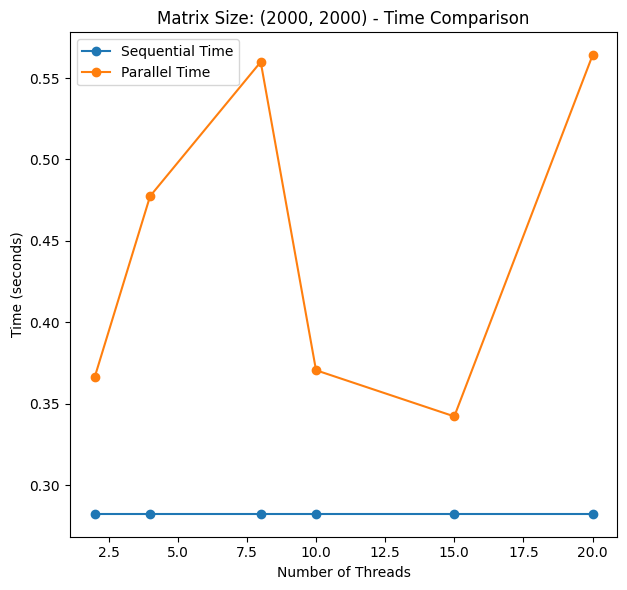

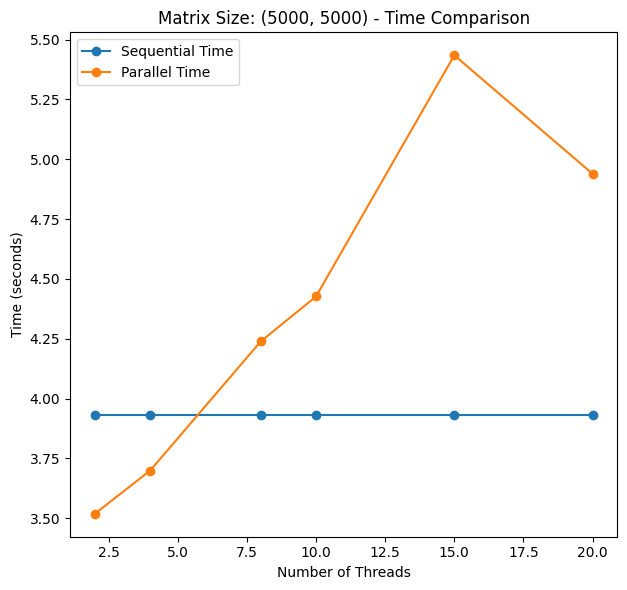

In [2]:
import matplotlib.pyplot as plt

matrix_sizes = df['Matrix Size'].unique()

for matrix_size in matrix_sizes:
    subset_df = df[df['Matrix Size'] == matrix_size]

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(subset_df['Threads'], subset_df['Sequential Time'], marker='o', label='Sequential Time')
    plt.plot(subset_df['Threads'], subset_df['Parallel Time'], marker='o', label='Parallel Time')
    plt.title(f"Matrix Size: {matrix_size} - Time Comparison")
    plt.xlabel("Number of Threads")
    plt.ylabel("Time (seconds)")
    plt.legend()
    plt.tight_layout()
    plt.show()